# Laser Self-Location Practice
---
<img src="resources/logo_jderobot1.png" width="13%" height="13%" style="float:left;padding-right:5px"/>
<img src="resources/roomba.png" width="35%" height="35%" style="float:right;padding:10px"/>


## 1 - Introduction
---

The goal of this practice is to implement the logic that allows a robot (Roomba, as the one shown in the image on the right) to self locate in space. In particular, it is about getting the robot to carry out an algorithm of self-location, using only a laser sensor, to estimate its position in a given space (of which a map has been provided).
This practice has been desgined to be done using the [Particles Filter Method](https://es.wikipedia.org/wiki/Filtro_de_part%C3%ADculas), which uses the <font color=orange>Roulette Algorithm</font>.

For this practice a world has been designed for the Gazebo simulator (see section 2.1). The main task will consist of making the robot know its location at any time possible.

To do so, you will have to use different algorithms involved in this task, for which you should have knowledge enough about:
<img src="resources/logo_jderobot2.png" width="15%" height="15%" style="float:right;padding:10px;margin-right:85px"/>
* Python programming skills
* Particles Filter
* Roulette Algorithm
* Ray Tracing
* Image Processing
* Basic Statistics

## 2 - Exercise components
---
<img src="resources/loc_laser_world.png" width="50%" height="500%" style="float:left;padding-right:10px;margin-top:15px;padding-left:10px;padding-bottom:7px;"/>

### 2.1 Gazebo Simulator

Gazebo simulator will be running in the background. The Gazebo world employed for this exercise has a 3D model of the interior of a house. The chosen house does not have any element difficult to model (all the elements are walls) in such a way that there will be no problems with the data offered by the robot's laser sensor.
The robot used, as already mentioned, is a Roomba model by iRobot, which incorporates a unique laser sensor, an odometry sensor and basic motors. This world is the one shown on the left.


### 2.2 Laser Loc Component

This component has been developed specifically to carry out this exercise. It connects to Gazebo to communicate with the vacuum cleaner (send orders to it and receive sensors data). The student has to modify this component and add code to accomplish the exercise. In particular, it is required to modify the execute method and the CalculateNewGeneration function as explained in 3.1 and 3.2.

### 2.3 Jupyter Map Widget

To make the practice more visual, we have incorporated jupyter widgets so you can see the same map that the robot has, and some methods so that the steps you are coding get reflected in the image (particle painting, robot, estimations,...

__//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////__

__TO SEE ANY CHANGES ON THE MAP, AFTER MAKING THEM, YOU WILL NEED TO PLACE THE MOUSE CURSOR ABOVE THE MAP WIDGET__

__//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////__

## 3 - Exercise initialization
---
First of all, we need to connect with the robot through Gazebo simulator. Run the following code cell:

In [1]:
import subprocess

simulator = subprocess.Popen(("roslaunch", "create_world.launch"))

Wait a few seconds until it has launched. Now we need to import all required python modules to carry out the practice, and then call ``Laser Loc`` class once. The following code will also render the map widget mentioned in 2.3, and some buttons to <font color=green>Play Your Code</font> and <font color=blue>Calculate New Generations</font> of particles.

__Remember that before pushing those buttons you need to code your execute() and calculateNewGeneration methods!__

Once you think that you are ready to run your code (__see 3.1 and 3.2__) Run this code and wait a few seconds until LaserLoc initialization finishes with an ``OK`` message that will appear below the map:

/////////////
<a id='work'>WORKING CELL</a>
////////////

<IPython.core.display.Javascript object>


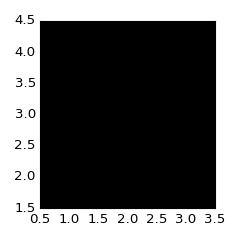

Button(button_style=u'danger', description=u'Stop Robot', icon=u'car', layout=Layout(margin=u'0 0 0 25%'), style=ButtonStyle(), tooltip=u'gen')

Button(button_style=u'info', description=u'New Generation', icon=u'legal', layout=Layout(margin=u'0% 0 0 25%'), style=ButtonStyle(), tooltip=u'gen')

Button(button_style=u'success', description=u'Play Code', icon=u'check', layout=Layout(margin=u'0 0 0 25%'), style=ButtonStyle(), tooltip=u'gen')

HTML(value=u'Event information appears here when you click on the figure', layout=Layout(margin=u'0 0 0 15%'))

<IPython.core.display.Javascript object>


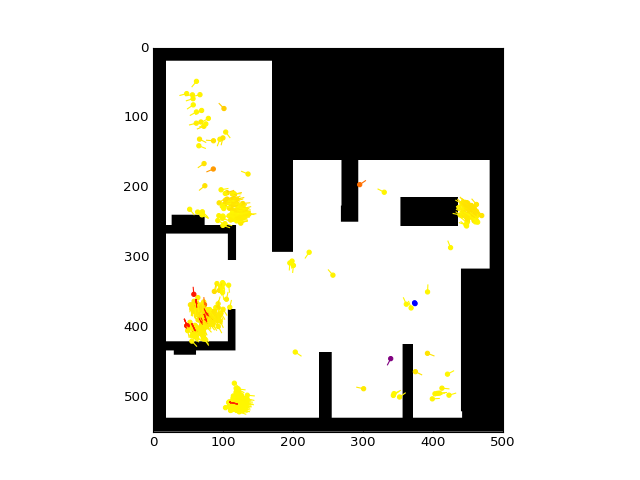

loading Config file ./laser_loc_conf.yml
Publishing LaserLoc.Motors with ROS messages
Receiving LaserLoc.Pose3D from ROS messages
Receiving LaserLoc.Laser  LaserData from ROS messages
loading Config file ./laser_loc_conf.yml
Laser Loc Component initialized OK


Laser Loc is running
new generation
pac: 10.5525723074
new generation
new generation
pac: 12.1333625033
new generation
pac: 219.986817574
new generation
new generation
RESTARTING...
new generation
pac: 7.87758379985
new generation
pac: 4.82607966859
new generation
pac: 9.43313217365
new generation
pac: 7.94149763011
new generation
pac: 40.4067431949
new generation
pac: 25.2665668368
new generation
pac: 67.5982115365
new generation
pac: 97.6203960577
new generation
pac: 156.513754316
new generation
pac: 174.609660562
new generation
pac: 204.973421965
new generation
pac: 202.664873941
new generation
pac: 203.060882802
new generation
pac: 201.585275781
new generation
new generation
RESTARTING...new generation
pac: 122.021591911


In [2]:
#! usr/bin/env python
# -*- coding: utf-8 -*-

%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import Layout, Box, VBox
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from IPython.core.display import HTML
from laser_loc import LaserLoc
import random, math, copy
import numpy as np
from particles import Particle

global ax2, press
press = None
def on_press(event):
    global ax2, press
    if event.inaxes != ax2: 
        return

    press = event.xdata, event.ydata

def on_motion(event):
    global ax2,press
    if press is None: 
        return
    if event.inaxes != ax2: 
        return
    ax2.cla()
    newX = event.xdata
    newY = event.ydata
    ax2.patch.set_facecolor((0.0, 0.0, 0.0))
    plt.vlines(newX, 3+(0.5*3), 3-(0.5*3), color=[1.0,1.0,1.0], linestyle='-') 
    plt.hlines(newY, 2+(0.5*3), 2-(0.5*3), color=[1.0,1.0,1.0], linestyle='-')
    #ll.moveTeleop(newX,newX)


def on_release(event):
    global press
    press = None
    finalx = event.xdata
    finaly = event.ydata
    ll.moveTeleop(finalx,finaly)
    
def stopRobot(b):
    global ax2
    ax2.cla()
    ax2.patch.set_facecolor((0.0, 0.0, 0.0))
    plt.vlines(2, 3+(0.5*3), 3-(0.5*3), color=[1.0,1.0,1.0], linestyle='-') 
    plt.hlines(3, 2+(0.5*3), 2-(0.5*3), color=[1.0,1.0,1.0], linestyle='-')
    ll.moveTeleop(2.0,3.0)

fig2, ax2 = plt.subplots(figsize=(3, 3))
plt.tight_layout()
ax2.patch.set_facecolor((0.0, 0.0, 0.0))
plt.vlines(2, 3+(0.5*3), 3-(0.5*3), color=[1.0,1.0,1.0], linestyle='-') 
plt.hlines(3, 2+(0.5*3), 2-(0.5*3), color=[1.0,1.0,1.0], linestyle='-')
plt.grid(False)

sr = widgets.Button(
    description='Stop Robot',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='gen',
    icon='car',
    layout=Layout(margin='0 0 0 25%')
)
display(sr)
sr.on_click(stopRobot)

cidpress = fig2.canvas.mpl_connect('button_press_event', on_press)
cidrelease = fig2.canvas.mpl_connect('button_release_event', on_release)
cidmotion = fig2.canvas.mpl_connect('motion_notify_event', on_motion)


global p

def playCode(pb):
    ll.play()
    
def newGeneration(b):
    ll.algorithm.newGeneration = True
    
def onclick(event):
    global p
    w.value = 'YOU HAVE CLICKED: x=%d, y=%d, xdata=%f, ydata=%f'%(
               event.x, event.y, event.xdata, event.ydata)
    p = ll.map.particleClicked([event.xdata, event.ydata])
    
b = widgets.Button(
    description='New Generation',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='gen',
    icon='legal',
    layout=Layout(margin='0% 0 0 25%')
)
display(b)
pb = widgets.Button(
    description='Play Code',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='gen',
    icon='check',
    layout=Layout(margin='0 0 0 25%')
)
display(pb)
w = widgets.HTML("Event information appears here when you click on the figure", layout=Layout(margin='0 0 0 15%'))
display(w)

fig, ax = plt.subplots()
ll = LaserLoc(ax)
ax.imshow(ll.map.map)
cid = fig.canvas.mpl_connect('button_press_event', onclick)


b.on_click(newGeneration)
pb.on_click(playCode)
HTML("laserloc.html")

The Output cell that is above will contain all the necessary to achieve the goal of this practice (map and drawing events). However, for debugging purposes, you can click on any particle on the image (one you have coded the execute method and clicked over the <font color=green>Play Code</font> button) and run the next code to see a plot that represents the sensor data (laser).

__Note:__ If you don't see it properly because of the axes got reduced, don't worry, rerun the cell or click in the plot to adjust axes.

In [11]:
try:
    ll.algorithm.particleClicked = p
    ll.algorithm.calculated = False
except:
    print("No particle selected!")

('Particle Probability: ', 0.5763577934521615)


### 3.1 - The execute() method

If you try to push the buttons without doing this steps you will see that nothing happens. This method is where you have to write the code that manages the generations computed by the calculateNewGeneration function (see section 3.2) and transform that data into orders for the visualization widget, so that you can see the estimations made by your algorithm.

For the laser data visualization, a variable is provided that contains the particle you have last clicked on:
```
self.particleClicked
```
So you can use it in your execute() method, calculate its theorical laser with the ray tracing algorithm you need to code, and paint it if you needed it:
```
if self.particleClicked is not None and not self.calculated:
    tLaser = yourRayTracingMethod(self.particleClicked)
    print("Particle Probability: ", self.particleClicked.prob) # trace
    self.map.parent.paintLaser(tLaser) # Function to paint laser data
    self.calculated = True
```
Remember that paricles are sent in the simulated world, so they have to store x,y world coordinates, but the visualization works with pixels. The paintParticles method provided already does this conversion, but you may need to make this change for going through other tasks. Some functions are also provided to convert coordinates to pixel and vice versa. They are dailed in the API section.

The execute() method from LaserLoc component will be called iteratively about 10 times per second. To understand how it works, we are going to print a message in each iteration so you can see the output. For that, scroll to the [Working Cell](#work) (or click this link), run it (so you initiallize LaserLoc component) and then run the following code:

In [ ]:
#ll.stop()
def execute(self):
    print "Running execute iteration"
      
ll.setExecute(execute)
#ll.play()

Now, go back to the [Working Cell](#work) by clicking the link, run it and click on the <font color=green>Play Button</font>, so you are able to see the output.

Now that you have seen it, stop printing this message. To do that, update the execute method, this time with an empty instruction:

__Important Note:__ If you prefer it, uncomment the two commented lines that stop (ll.stop()) and play (ll.play()) the execute method. This is only to debug or testing purposes. Once you have coded everything, you need to run only the [Working Cell](#work), so that all the output appears there (because of jupyter limitations, you can't makes changes on the map widget if you are not running the working cell). It is up to you.

In [ ]:
#ll.stop()
def execute(self):  
    pass
    
ll.setExecute(execute)
#ll.play()

### 3.2 - The calculateNewGeneration function

This exercise uses the calculateNewGeneration function to compute and obtain the new generations of particles generated by the particles filter algorhythm after pushing the <font color=blue>New Generation</font> button. The first task you must go through is to write the code that uses that algorithm to get those generations. For that, you need to modify calculateNewGeneration function as follows:

In [ ]:
def calculateNewGeneration(self):
    print "GENERATING" # Add a message
      
    particles = []
    self.setParticles(particles) # you need to set the particles generated at the end of the function with this instruction (go to API section for further info)
ll.setCalculateNewGeneration(calculateNewGeneration)

### 3.3 - Running the code
---

Once both functions are coded, return to [Working Cell](#work) and run it, set them as shown, and then click on the <font color=green>Play Code</font> button to start and the <font color=blue>New Generation</font> button when you want to see your calculated new generation of particles.

### 3.4 - API:
---


__particle's API__:

    - a Particle class has been created, so you can use it as a constructor of particles as follows:
```
p = Particle(x,y,yaw,prob,self.map.robotAngle) # do not modify last parameter
```
    
__map's API__:

    - A map class is provided to make this problem easier. That class have some methods that you may find useful in your execute() method:
```
self.setParticles(particles) # set calculated particles in the map, so you can see them
self.setEstimation([x,y])    # set a estimation in the map, so you can see them
self.isAvailable(x,y)      # Find out if a x,y postion in available in the map (white part, not obstacle)
self.map.map2pixel([x,y])    # From world coordinates to pixel on the map
self.map.pixel2map([px,py])  # From pixel to world coordinates
self.map.parent.paintLaser(laser) # To paint selected laser in jupyter laser widget
```
__robot's API__:

    - There is the way to get robot's position and sensor information:
```
self.pose3d.getPose3d().x    # x coordinate
self.pose3d.getPose3d().y    # y coordinate
self.pose3d.getPose3d().yaw  # orientation
laser = self.parse_laser_data(self.laser.getLaserData()) # gets laser data and then parses it
```
__algorithm's API__:

    - You have some variables declared that you need to use:
```
self.newGeneration = False    # when set it to True, calls calculateNewGeneration function
self.particleClicked = None   # stores the last clicked particle
self.calculated = False       # for calculating laser for clicked particle just once (do not modify)
```

## 4 - Algorithm skeleton
---
We provide a __tentative basic__ skeleton where you can code your Laser Loc. This is one of the possible pipelines you can follow to get to the solution of this practice. Remember that you can follow the one that is easiest for you. We propose:

In [ ]:
def calculateNewGeneration(self):
    print("new generation")
    # if not located:
        
        # Look for the most likely particle
        # Checking if the generation converges
        

        # if convergence:
            # Prediction in case of convergence
            # if Low Probbility -> Resample
                
        # elif prob > 0.99 -> located!
        
            self.setEstimation((x,y))
            print("//////////////////////////////////////////////////////") 
            print("L O C A T E D   AT   ({},{})".format(x,y))
            print("Error: {} cm".format(math.sqrt(math.pow(x-self.pose3d.getPose3d().x,2)+math.pow(y-self.pose3d.getPose3d().y,2)*100)))
            print("//////////////////////////////////////////////////////") 
            located = True;
        #else:
            # Rest of cases: Calculate New Generation Based on the Previous
            # Computation of cumulative probability (PAC)
            print ("pac: {}".format(pac))

            
            #if Low PAC -> Resample
                
            #else:
                # Acceptable PAC -> Apply Thermal Noise
                ## ROULETTE ALGORITHM
               
                # particles filter
                # elitim, resampling or thermal noise based in progenitors
                                    
    # else:
        # when located, restart the algorithm
        print("RESTARTING...")
        self.particles = []
        # random sending
        located = False;
        self.convergence = False;

    self.setParticles(self.particles) #set the new generation of particles

ll.setCalculateNewGeneration(calculateNewGeneration)

In [ ]:
def execute(self):
    # vars initiallization
    if not self.initiallized:
        #initiallize if needed
        
    #if not self.particles  
        # Random SENDING
        # find available position, calculate laser via Ray tracing
        # compute probability via laser and health function
            
        self.setParticles(self.particles)
    
    if self.particleClicked is not None and not self.calculated:
        # calculate laser via Ray Tracing

        # paint the laser
        print("Particle Probability: ", self.particleClicked.prob)
        self.map.parent.paintLaser(self.parse_laser_data(self.laser.getLaserData()))
        self.map.parent.paintLaser(tLaser)
        self.calculated = True

    # New generations each click on the button
    if self.newGeneration:
        self.newGen()
        self.newGeneration = False
      
ll.setExecute(execute)